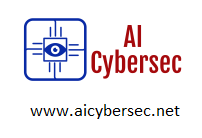

# Regression reference code

---

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1">Load the data</a></span></li><li><span><a href="#Specify-predictor-matrix-and-target-variable" data-toc-modified-id="Specify-predictor-matrix-and-target-variable-2">Specify predictor matrix and target variable</a></span></li><li><span><a href="#Get-train-test-split" data-toc-modified-id="Get-train-test-split-3">Get train-test split</a></span></li><li><span><a href="#Standardize-the-data" data-toc-modified-id="Standardize-the-data-4">Standardize the data</a></span></li><li><span><a href="#Fit-a-linear-regression-model" data-toc-modified-id="Fit-a-linear-regression-model-5">Fit a linear regression model</a></span></li><li><span><a href="#Fit-a-Ridge-model" data-toc-modified-id="Fit-a-Ridge-model-6">Fit a Ridge model</a></span></li><li><span><a href="#Fit-a-Lasso-model" data-toc-modified-id="Fit-a-Lasso-model-7">Fit a Lasso model</a></span></li><li><span><a href="#Fit-a-RidgeCV-model" data-toc-modified-id="Fit-a-RidgeCV-model-8">Fit a RidgeCV model</a></span></li><li><span><a href="#Fit-a-LassoCV-model" data-toc-modified-id="Fit-a-LassoCV-model-9">Fit a LassoCV model</a></span></li><li><span><a href="#Ridge-and-Lasso-Regression:-L1-and-L2-Regularization" data-toc-modified-id="Ridge-and-Lasso-Regression:-L1-and-L2-Regularization-10">Ridge and Lasso Regression: L1 and L2 Regularization</a></span></li></ul></div>

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [1]:
from sklearn.datasets import load_diabetes, load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV

## Load the data

In [4]:
# load the data
data = load_diabetes()

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## Specify predictor matrix and target variable

In [197]:
# specify predictor matrix and target variable
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## Get train-test split

In [198]:
# get train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Standardize the data

In [199]:
# standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

## Fit a linear regression model

In [200]:
# create a linear regression model instance
model = LinearRegression()

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))

# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.36653529 0.49962128 0.4009883  0.54757847 0.52418711]
Mean cross-validated training score: 0.46778209239489427
Training Score: 0.5332286426891121
Test Score: 0.4384360401733268


In [201]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-1.449669,1.449669
sex,-12.937877,12.937877
bmi,25.402970,25.402970
bp,15.616996,15.616996
s1,-27.609799,27.609799
s2,15.672747,15.672747
s3,-1.310098,1.310098
s4,6.625359,6.625359
s5,32.182990,32.182990
s6,3.019814,3.019814


<AxesSubplot:>

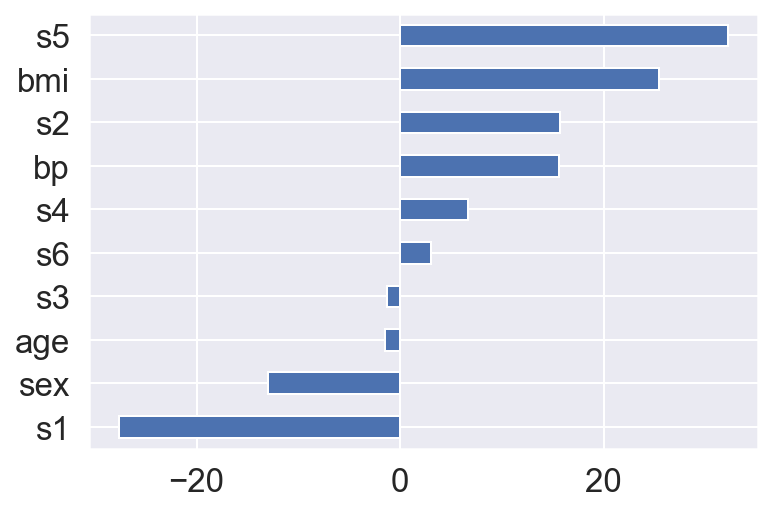

In [202]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a Ridge model

In [203]:
# create a Ridge model instance
model = Ridge(alpha=21)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))

# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.38611262 0.50398026 0.43823966 0.5520589  0.52333993]
Mean cross-validated training score: 0.48074627112058266
Training Score: 0.5308991765209591
Test Score: 0.4319337703936593


In [204]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-1.047129,1.047129
sex,-11.855951,11.855951
bmi,24.602814,24.602814
bp,14.866698,14.866698
s1,-4.373441,4.373441
s2,-2.400336,2.400336
s3,-10.441232,10.441232
s4,5.010447,5.010447
s5,21.905003,21.905003
s6,3.671223,3.671223


<AxesSubplot:>

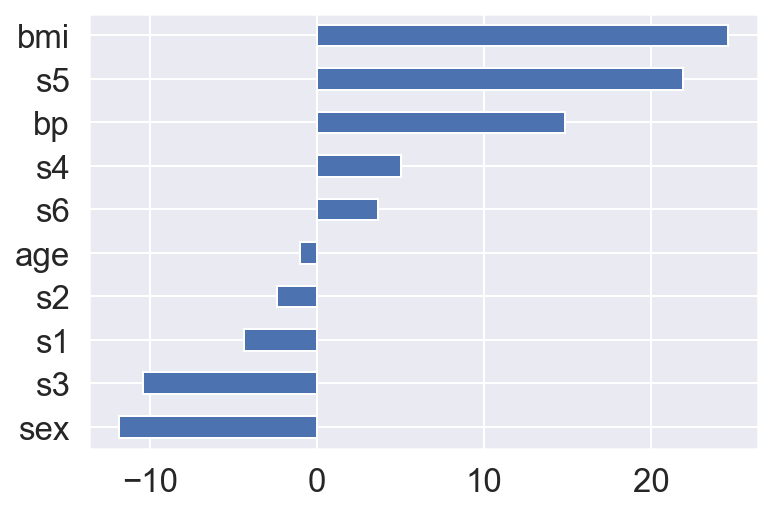

In [205]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a Lasso model

In [206]:
# create a Lasso model instance
model = Lasso(alpha=0.35)

# get cross validated scores
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit(X_train, y_train)
print("Training Score:", model.score(X_train, y_train))

# evaluate the data on the test set
print("Test Score:", model.score(X_test, y_test))

Cross-validated training scores: [0.37219465 0.51258123 0.42869098 0.55362436 0.52594589]
Mean cross-validated training score: 0.4786074231480185
Training Score: 0.5318196412757628
Test Score: 0.4320201527567904


In [207]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-0.969439,0.969439
sex,-12.169458,12.169458
bmi,25.564524,25.564524
bp,14.982724,14.982724
s1,-6.453091,6.453091
s2,-0.000000,0.000000
s3,-10.805683,10.805683
s4,2.742000,2.742000
s5,24.399334,24.399334
s6,2.823150,2.823150


<AxesSubplot:>

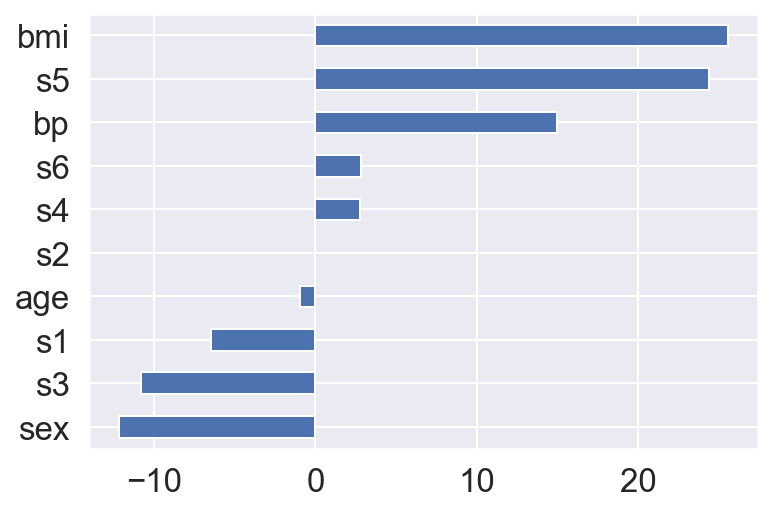

In [208]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a RidgeCV model

In [217]:
# create a RidgeCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)

# fit the model
model.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model.alpha_)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 21.54434690031882
Training score: 0.5308503777787441
Test Score: 0.431950443378022


In [210]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,columns=['coefficients'])

# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-1.037276,1.037276
sex,-11.832096,11.832096
bmi,24.576819,24.576819
bp,14.851334,14.851334
s1,-4.295065,4.295065
s2,-2.455987,2.455987
s3,-10.452716,10.452716
s4,5.024122,5.024122
s5,21.844234,21.844234
s6,3.683815,3.683815


<AxesSubplot:>

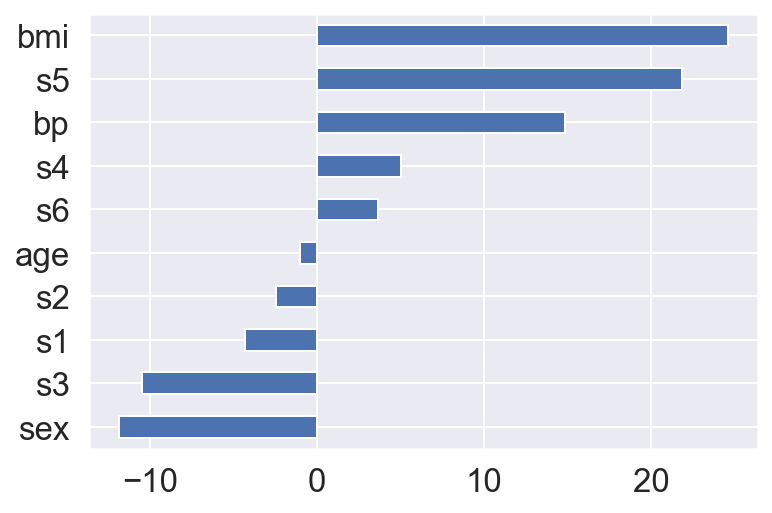

In [211]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

## Fit a LassoCV model

In [212]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)

# fit the model
model.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model.alpha_)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.3593813663804626
Training score: 0.5318025315281588
Test Score: 0.43201794608719724


In [213]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
age,-0.956981,0.956981
sex,-12.152088,12.152088
bmi,25.561615,25.561615
bp,14.968865,14.968865
s1,-6.393490,6.393490
s2,-0.000000,0.000000
s3,-10.856287,10.856287
s4,2.670422,2.670422
s5,24.387567,24.387567
s6,2.816100,2.816100


<AxesSubplot:>

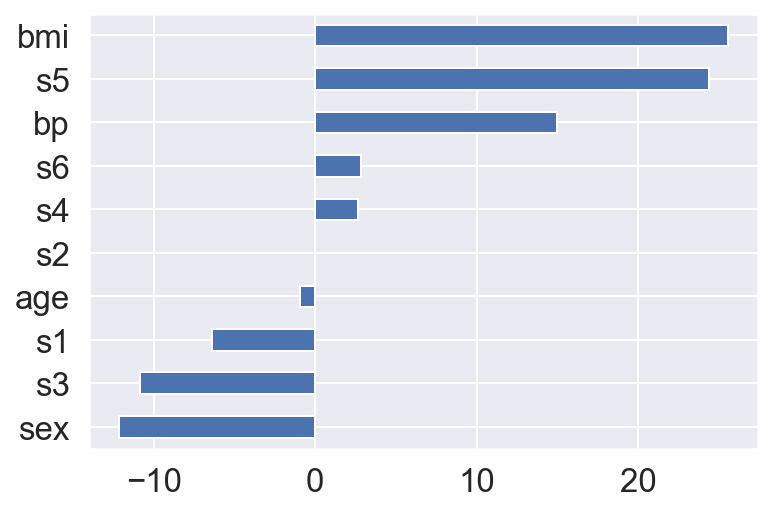

In [214]:
# plot the magnitude of the coefficients
df_coef['coefficients'].sort_values().plot(kind='barh')

In [215]:
################################################################################################################################

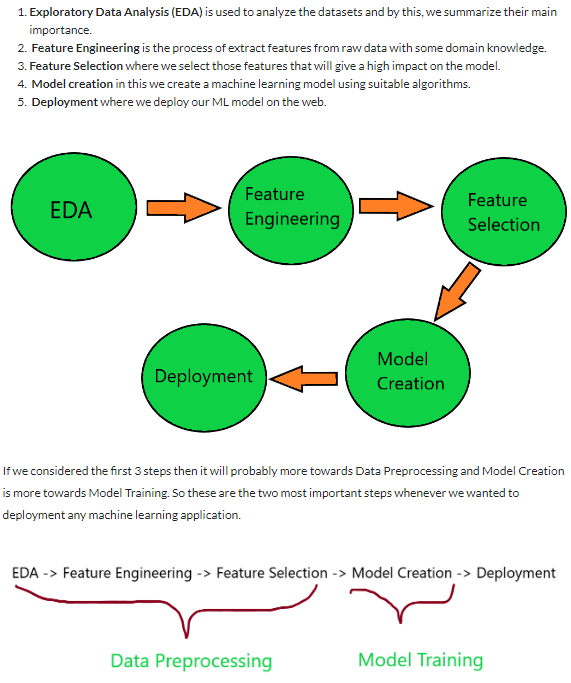

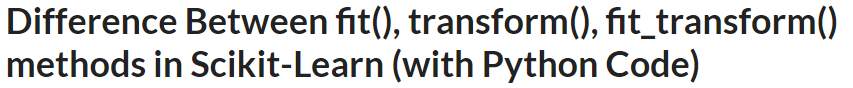

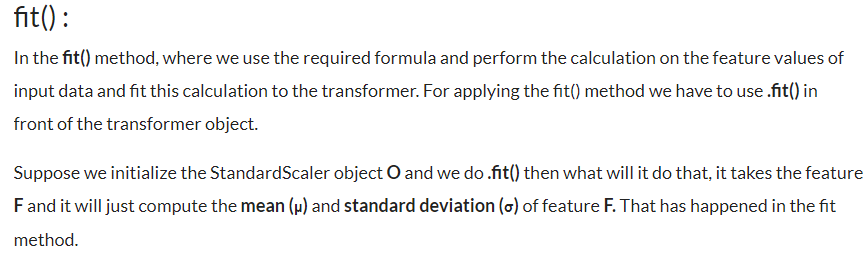

In [16]:
# fit()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split training and testing data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# creating object 
stand= StandardScaler()

# fit data
Fit= stand.fit(X_train)

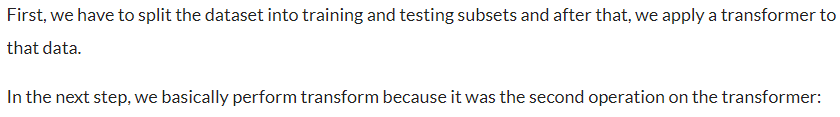

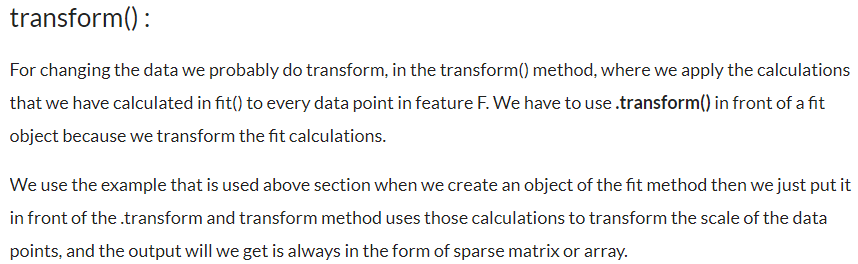

In [22]:
# transform()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split training and testing data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

# creating object
stand= StandardScaler()

# fit data
Fit= stand.fit(X_train)

# transform data
X_scaled = Fit.transform(X_train)

In [23]:
X_scaled

array([[ 6.42054387e-01,  1.05661647e+00,  6.19059528e-01, ...,
         6.76301514e-01,  1.27564058e+00, -2.79646760e-04],
       [ 1.58492079e+00, -9.46417203e-01,  1.71984406e+00, ...,
        -8.48887236e-02,  8.95417194e-02,  1.72793733e+00],
       [-1.24367842e+00,  1.05661647e+00, -2.79540092e-01, ...,
         6.76301514e-01,  3.90267153e-01,  1.12306139e+00],
       ...,
       [ 6.42054387e-01, -9.46417203e-01, -4.81725006e-01, ...,
        -8.46078961e-01, -2.67782097e-01, -8.66904956e-02],
       [-3.00812016e-01, -9.46417203e-01, -5.49119978e-01, ...,
        -8.48887236e-02, -8.43105525e-01, -8.64388135e-01],
       [-2.02940042e+00, -9.46417203e-01,  5.29199566e-01, ...,
        -8.46078961e-01, -1.47535315e-01, -8.66904956e-02]])

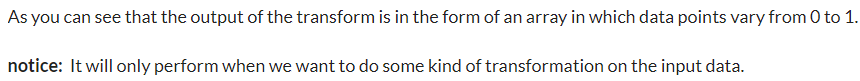

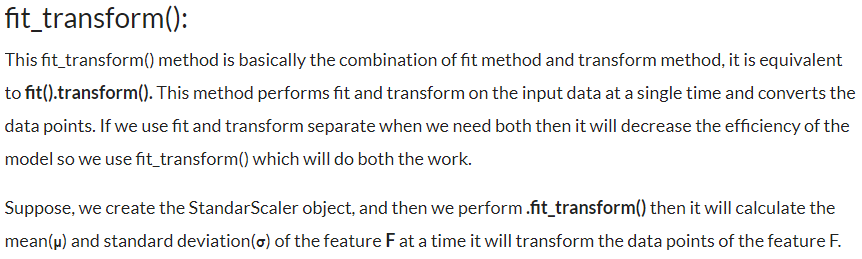

In [19]:
# fit_transform()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split training and testing data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

stand= StandardScaler()
Fit_Transform = stand.fit_transform(X_train)
Fit_Transform

array([[ 6.42054387e-01,  1.05661647e+00,  6.19059528e-01, ...,
         6.76301514e-01,  1.27564058e+00, -2.79646760e-04],
       [ 1.58492079e+00, -9.46417203e-01,  1.71984406e+00, ...,
        -8.48887236e-02,  8.95417194e-02,  1.72793733e+00],
       [-1.24367842e+00,  1.05661647e+00, -2.79540092e-01, ...,
         6.76301514e-01,  3.90267153e-01,  1.12306139e+00],
       ...,
       [ 6.42054387e-01, -9.46417203e-01, -4.81725006e-01, ...,
        -8.46078961e-01, -2.67782097e-01, -8.66904956e-02],
       [-3.00812016e-01, -9.46417203e-01, -5.49119978e-01, ...,
        -8.48887236e-02, -8.43105525e-01, -8.64388135e-01],
       [-2.02940042e+00, -9.46417203e-01,  5.29199566e-01, ...,
        -8.46078961e-01, -1.47535315e-01, -8.66904956e-02]])

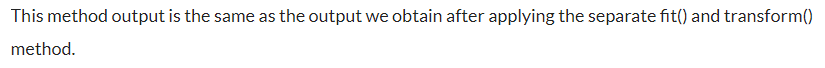

In [ ]:
################################################################################################################################

## Ridge and Lasso Regression: L1 and L2 Regularization

In [54]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [55]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [57]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [56]:
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target

In [58]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [72]:
newX=boston_df.drop('Price',axis=1)
newX.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [63]:
print ((newX[0:3])) # check 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  


In [73]:
newY=boston_df['Price']
newY.head(3)

0    24.0
1    21.6
2    34.7
Name: Price, dtype: float64

In [65]:
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

In [66]:
print ((len(X_test), len(y_test)))

(152, 152)


In [67]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [68]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

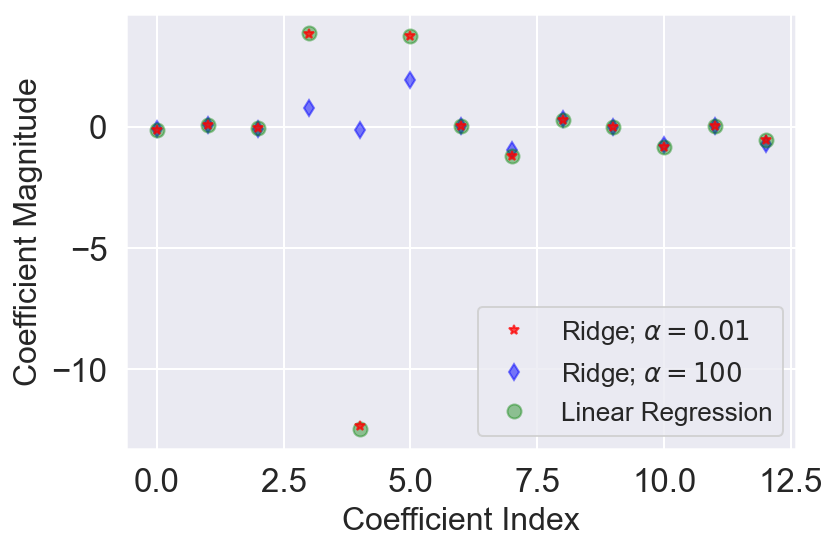

In [69]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

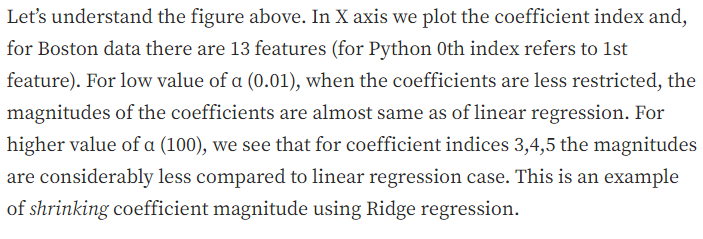

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498829
test score for alpha =0.01:  0.6641831577726228
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.7754092006936698
test score for alpha =0.0001:  0.7318608210757919
number of features used: for alpha =0.0001: 22
LR training score: 0.7842206194055069
LR test score:  0.7329325010888672


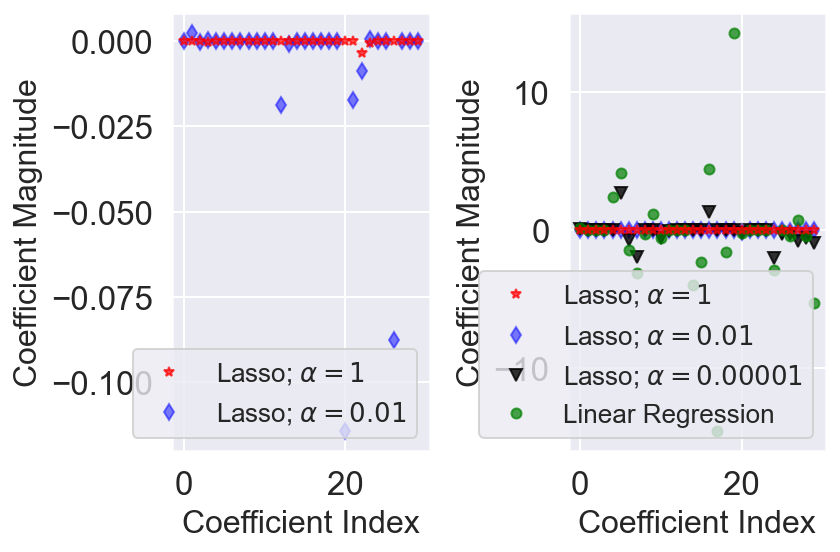

In [52]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score

cancer = load_breast_cancer()
#print cancer.keys()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

#print cancer_df.head(3)
X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

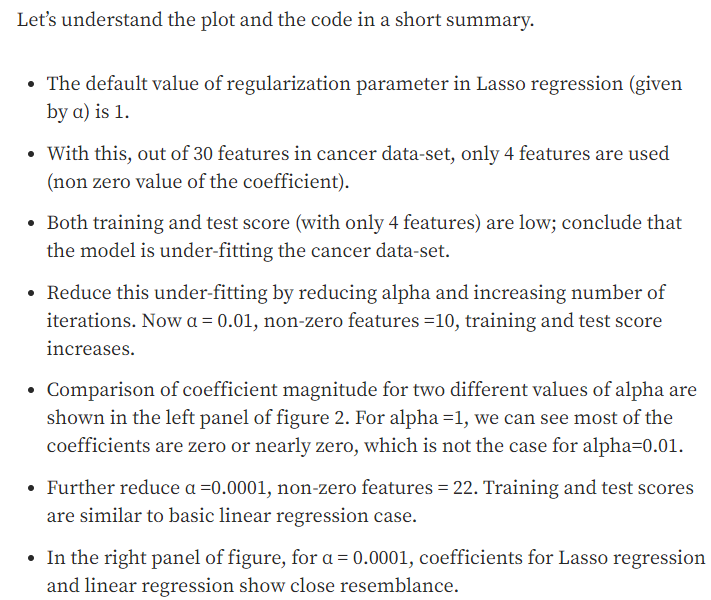